In [3]:
import numpy as np
import pandas as pd
import pyflux as pf
import matplotlib.pyplot as plt
import datetime

In [5]:
noise = np.random.normal(0,1,100)
y = np.zeros(100)
x1 = np.random.normal(0,1,100)
x2 = np.random.normal(0,1,100)
 
for i in range(1,len(y)):
    y[i] = 0.9*y[i-1] + noise[i] + 0.1*x1[i] - 0.3*x2[i]
data = pd.DataFrame([y,x1,x2]).T
data.columns = ['y', 'x1', 'x2']
 
y_oos = np.random.normal(0,1,30)
x1_oos = np.random.normal(0,1,30)
x2_oos = np.random.normal(0,1,30)
 
data_oos = pd.DataFrame([y_oos,x1_oos,x2_oos]).T
data_oos.columns = ['y', 'x1', 'x2']

In [18]:
model = pf.ARIMAX(formula="y ~ x1 + x2", data=data, ar=1, ma=1)
x = model.fit()

In [23]:
data_oos

,y,x1,x2
0,0.014197,0.401323,0.192000
1,0.578557,0.686936,1.030135
2,0.487305,-0.254677,-1.952640
3,-0.365984,1.236256,0.746414
4,0.137601,0.252053,1.646488
5,-0.405827,0.770589,0.638007
6,-0.304816,-0.623809,0.830392
7,-0.095679,1.295367,0.219586
8,1.340233,-0.257672,-0.919456
9,-1.009562,-0.651686,-0.683489


In [22]:
model.predict(h=30, oos_data=data_oos)

,y
100,-1.056838
101,-1.176680
102,-1.040398
103,-1.178630
104,-1.289953
105,-1.353283
106,-1.334517
107,-1.396729
108,-1.287038
109,-1.185823


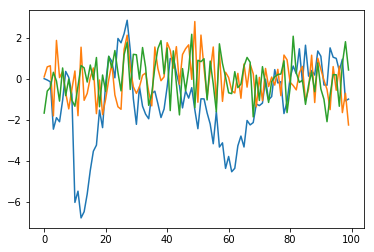

In [20]:
plt.plot(data)

In [12]:
24*14

336

In [4]:
kw_df = pd.read_csv("juyo-2018.csv", names=['DATE','TIME','observe'])

In [5]:
tmp = kw_df[5088:5424]

In [6]:
kw_df['DATE']=pd.date_range('2018-08-01 00:00', periods=5832, freq='H')

In [7]:
kw_df=kw_df.drop("TIME", axis=1)

In [8]:
kw_df = kw_df.set_index("DATE")

In [9]:
tmp = kw_df[0:672]

In [10]:
tempe = pd.read_csv("data.csv", names=['temperature','a','b'])

In [11]:
tempe['DATE']=pd.date_range('2018-08-01 00:00', periods=672, freq='H')

In [12]:
tempe = tempe.set_index("DATE")

In [13]:
tmp["temperature"] = tempe["temperature"]

In [14]:
tmp = tmp.reset_index()

In [15]:
tmp = tmp.drop("DATE",axis=1)

In [16]:
data = tmp[0:336]

In [17]:
data_oos = tmp[336:]

In [18]:
y=tmp['observe']

In [19]:
observe = np.array(y)

In [20]:
x=tmp['temperature']

In [21]:
temperature = np.array(x)*20000

In [42]:
model = pf.ARIMAX(formula="observe ~ temperature + temperature", data=data, ar=24, ma=3)
x = model.fit()

In [37]:
pred = model.predict(h=336,oos_data=data_oos)

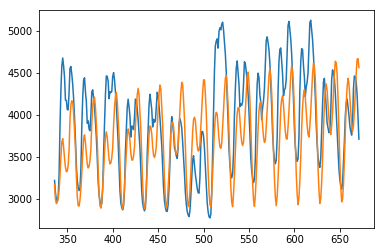

In [38]:
plt.plot(data_oos["observe"])
plt.plot(pred)
#plt.plot(temperature[336:672])

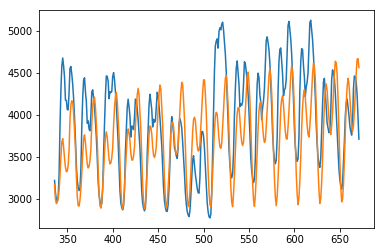

In [164]:
plt.plot(data_oos["observe"])
plt.plot(pred)

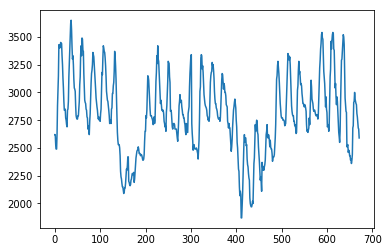

In [25]:
plt.plot(temperature)

## 参考
[時系列データの予測ライブラリ--PyFlux--](https://qiita.com/GushiSnow/items/437dde3293f6d77bfa58)

[時系列データにおける異常検知](https://www.kabuku.co.jp/developers/time_series_anomaly_detect)

[ARIMAX example](https://programtalk.com/python-examples/pyflux.ARIMAX/)

[Statsmodels formula API と多項式回帰モデル](https://qiita.com/TomokIshii/items/c0f6c20658ea7f1170f2)

[patsyを使ってPythonでもformulaを使う](https://qiita.com/ysk24ok/items/6c9de78c022005506c9d)

[statsmodelsで多次元とか多項式の最小二乗法](http://www.mwsoft.jp/programming/numpy/statsmodels_ols.html)
